In [163]:
#Import the needed libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from google.colab import files
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler

In [180]:
df = pd.read_csv("coches_dataset2.csv.csv")

#the dataset came with some undefined boolean variables, so let´s erase them 
#because it will be impossible to use them, we´ll also erase the location region
#due to its illegibility
df = df.drop(["feature_0","feature_1", "feature_2", "feature_3", "feature_4",
              "feature_5", "feature_5", "feature_6", "feature_7", "feature_8", 
              "feature_8", "feature_9", "location_region"], axis = 1)


df.tail(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
38521,Chrysler,Neon,mechanical,green,260000,1995,gasoline,False,gasoline,2.0,sedan,False,owned,front,550.00,True,7,12,215
38522,Chrysler,PT Cruiser,automatic,other,207605,2004,gasoline,False,gasoline,2.4,hatchback,False,owned,front,4000.00,False,8,44,221
38523,Chrysler,Grand Voyager,mechanical,black,278000,1999,diesel,False,diesel,2.5,minivan,False,owned,front,4220.81,False,5,20,239
38524,Chrysler,300,automatic,silver,240000,2001,gasoline,False,gasoline,3.5,sedan,False,owned,front,3000.00,True,6,11,264
38525,Chrysler,Voyager,mechanical,violet,317000,1999,gas,True,gasoline,2.0,minivan,False,owned,front,3300.00,True,8,28,269
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,85,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,20,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,63,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,156,490
38530,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,False,gasoline,2.4,minivan,False,owned,front,3200.00,True,4,73,632


In [181]:
#Get some more info about the variables in the dataframe:
df.info()

#Know if there is any null value:
df.isnull().values.any() 

#Now how many null values are there in the variable where there are null values:
print(df['duration_listed'].isnull().sum())
print(df['engine_capacity'].isnull().sum())
#There is 1 nan in "duration_listed" variable and 10 in engine_capacity.

#Fill nan´s with the mean average of the respective variable
df['duration_listed'].fillna((df['duration_listed'].mean()), inplace=True)
df['engine_capacity'].fillna((df['engine_capacity'].mean()), inplace=True)
#Recheck if there is any null value
print(df.isnull().values.any())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  number_of_photos   385

In [166]:
#Now let´s turn our categorical variables into numerical 
#in order to make our knn-s as profitable as possible

# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
df["color"] = le.fit_transform(df["color"])
df["body_type"] = le.fit_transform(df["body_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["engine_fuel"] = le.fit_transform(df["engine_fuel"])
df["is_exchangeable"] = le.fit_transform(df["is_exchangeable"])
df["engine_fuel"] = le.fit_transform(df["engine_fuel"])
df["drivetrain"] = le.fit_transform(df["drivetrain"])
df["state"] = le.fit_transform(df["state"])
df["has_warranty"] = le.fit_transform(df["has_warranty"])
df["engine_type"] = le.fit_transform(df["engine_type"])
df["engine_has_gas"] = le.fit_transform(df["engine_has_gas"])

print(df.head(1))
df.info()

  manufacturer_name model_name  transmission  color  odometer_value  \
0            Subaru    Outback             0      8          190000   

   year_produced  engine_fuel  engine_has_gas  engine_type  engine_capacity  \
0           2010            3               0            2              2.5   

   body_type  has_warranty  state  drivetrain  price_usd  is_exchangeable  \
0         10             0      2           0    10900.0                0   

   number_of_photos  up_counter  duration_listed  
0                 9          13               16  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  int64  
 3   color              38531 non-null  int64  
 4   odometer_value     38531 non-null  int6

[      0.          333333.33333333  666666.66666667 1000000.        ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   manufacturer_name      38531 non-null  object  
 1   model_name             38531 non-null  object  
 2   transmission           38531 non-null  int64   
 3   color                  38531 non-null  int64   
 4   odometer_value         38531 non-null  int64   
 5   year_produced          38531 non-null  int64   
 6   engine_fuel            38531 non-null  int64   
 7   engine_has_gas         38531 non-null  int64   
 8   engine_type            38531 non-null  int64   
 9   engine_capacity        38531 non-null  float64 
 10  body_type              38531 non-null  int64   
 11  has_warranty           38531 non-null  int64   
 12  state                  38531 non-null  int64   
 13  drivetrain           

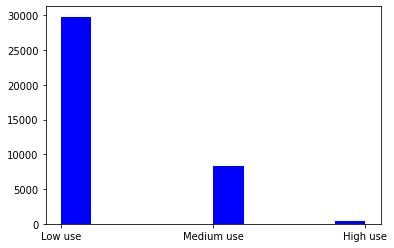

In [167]:
#We will divide the cars and its odometer values bins, so that we can see what
#is the amount of cars in each range
bins = np.linspace(min(df["odometer_value"]), max(df["odometer_value"]),4)
print(bins)


#percentile1=df["odometer_value"].scoreatpercentile(array, 33.3)
#perccentile2 = df["odometer_value"].scoreatpercentile(array, 66.6)

group_names = ["Low use", "Medium use", "High use"]
df["odometer_value_binned"]= pd.cut(df["odometer_value"], bins, labels = group_names, include_lowest = True)
plt.hist(df["odometer_value_binned"], color = "blue")
df.info()


In [168]:
from sklearn import neighbors, datasets
from sklearn import preprocessing 
#in order to select some random cars:
import random
a=[]
n= 500
for i in range(n):
    a.append(random.randint(1,len(df["odometer_value_binned"])))
print('Randomised list is: ',a)

#We´ll turn the odometer value binned variable into numerical also (1,2,3);:
df["odometer_value_binned"] = le.fit_transform(df["odometer_value_binned"])

#Let´s select the variables that our classifier will take into account (all
# except brand, model and obviously the odometer value):
X =df.iloc[a,[2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
#Let´s get the values of our odometer_value_binned variable
y = df.iloc[a,19].values

Randomised list is:  [19470, 10971, 13166, 12618, 37830, 7799, 11114, 18532, 33072, 28474, 17913, 12237, 13467, 34066, 15292, 18618, 19361, 25189, 26260, 1438, 37514, 25726, 22059, 22898, 24280, 13057, 6017, 28429, 20967, 22841, 7736, 6406, 9146, 11758, 18432, 2556, 12719, 2694, 26097, 33129, 35479, 20090, 24447, 27039, 1882, 5572, 32014, 22547, 30708, 27754, 22608, 32607, 32418, 7229, 29871, 27109, 24183, 27196, 14461, 3669, 28773, 798, 38453, 26949, 3446, 4930, 5884, 13463, 35907, 17119, 28341, 383, 2196, 1151, 18651, 33028, 5026, 28451, 32138, 19545, 12597, 8055, 33004, 732, 23207, 38418, 20351, 37522, 816, 23959, 11957, 16439, 27477, 26501, 21387, 32006, 19002, 30840, 2577, 17169, 7647, 38283, 11275, 18675, 990, 5712, 1488, 37678, 22988, 2122, 37235, 27575, 36784, 5739, 5914, 20683, 19649, 1120, 23994, 18590, 27515, 20323, 31657, 7688, 16229, 28334, 1406, 9777, 25355, 3045, 4553, 12164, 33470, 27242, 29796, 11765, 10266, 8403, 6278, 8138, 1107, 8471, 33505, 29659, 16738, 26413, 213

split the training and testing data.

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)

print(X_test.shape)


(400, 16)
(100, 16)


Standarize the data and create the training and testing sets

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Let´s choose the best number of neighbors for our knn, based on the error that each amount produces, the least, the better.



Minimum error: 0.13
K = 17


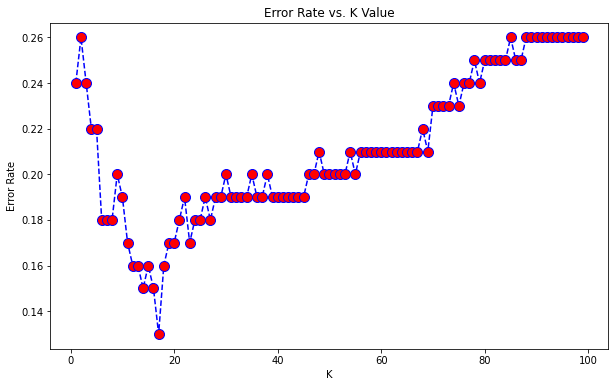

In [171]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate))
k = error_rate.index(min(error_rate))+1
print("K =", k)
#Here I will plot an error-k-neighbor plot that will help us a lot when it comes
#to decide the number of neighbors that will use in our knn

In [172]:
#Let´s set the amount of neighbors that our previous algorithm calculated for us
n_neighbors = k
classifier = KNeighborsClassifier(n_neighbors , weights='distance', algorithm = 'kd_tree')
classifier.fit(X_train, y_train)
classifier.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'distance'}

Print the prediction of the classifier over the test data

In [182]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]


Show the classification report and confusion matrix

In [174]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        74
           2       1.00      0.48      0.65        25

    accuracy                           0.86       100
   macro avg       0.61      0.49      0.52       100
weighted avg       0.87      0.86      0.84       100

[[ 0  1  0]
 [ 0 74  0]
 [ 0 13 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plot the scatterplot with year and price as x and y axis

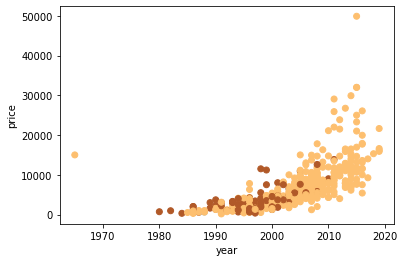

In [175]:
plt.scatter(df.iloc[a, 5], df.iloc[a, 14],c=y,cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('year')
plt.ylabel('price')
plt.show()

Plot the scatterplot with engine capacity and number of photos as x and y axis

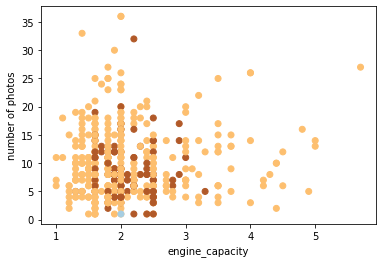

In [176]:
plt.scatter(df.iloc[a, 9], df.iloc[a, 16],c=y,cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('engine_capacity')
plt.ylabel('number of photos')
plt.show()

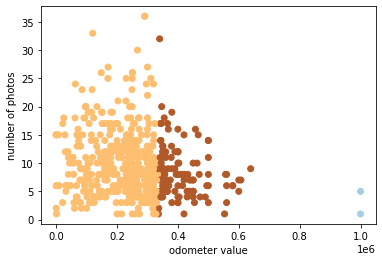

In [177]:
#For you to see how the data is really separated with odometer value
plt.scatter(df.iloc[a, 4], df.iloc[a, 16],c=y,cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('odometer value')
plt.ylabel('number of photos')
plt.show()

In [178]:
#Let´s create a car with a value for each argument so that we can see
#What section of number of kilometers does the classifier predict
df.info()
transmission = df["transmission"].mean()
color = df["color"].mean()       
year_produced  = df["year_produced"].mean()
engine_fuel = df["engine_fuel"].mean()               
engine_has_gas = df["engine_has_gas"].mean()            
engine_type = df["engine_type"].mean() 
engine_capacity = df["engine_capacity"].mean()        
body_type = df["body_type"].mean()            
has_warranty  = df["has_warranty"].mean()            
state = df["state"].mean()               
drivetrain  = df["drivetrain"].mean()                   
price_usd  = df["price_usd"].mean()               
is_exchangeable = df["is_exchangeable"].mean()             
number_of_photos = df["number_of_photos"].mean()             
duration_listed = df["duration_listed"].mean() 
up_counter = df["up_counter"].mean()



pred_class = classifier.predict([[transmission,color, year_produced, engine_fuel, 
engine_has_gas, engine_type, engine_capacity, body_type, has_warranty, state, 
drivetrain, price_usd, is_exchangeable, number_of_photos,up_counter,
duration_listed]])

print(pred_class)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      38531 non-null  object 
 1   model_name             38531 non-null  object 
 2   transmission           38531 non-null  int64  
 3   color                  38531 non-null  int64  
 4   odometer_value         38531 non-null  int64  
 5   year_produced          38531 non-null  int64  
 6   engine_fuel            38531 non-null  int64  
 7   engine_has_gas         38531 non-null  int64  
 8   engine_type            38531 non-null  int64  
 9   engine_capacity        38531 non-null  float64
 10  body_type              38531 non-null  int64  
 11  has_warranty           38531 non-null  int64  
 12  state                  38531 non-null  int64  
 13  drivetrain             38531 non-null  int64  
 14  price_usd              38531 non-null  float64
 15  is

In [ ]:
print ("Train Accuracy : " + str(classifier.score(X_train, y_train)))


In [ ]:
print ("Test Accuracy : " + str(classifier.score(X_test, y_test)))

It seems to be a great accuracy!